## **演示0303：生成随机变量**

### **案例1：均匀分布产生随机数：rand, random, randint**
> **查看numpy中均匀分布产生的随机数分布情况**
 * *np.random.rand*、*np.random.random*均可用于生成0~1之间的随机浮点数
 * *np.randint*可生成指定区间内的随机整数
 * 在0~100中生成大量的随机整数，分别统计每个整数值的个数，可以发现，0~100之间的个数大体相当

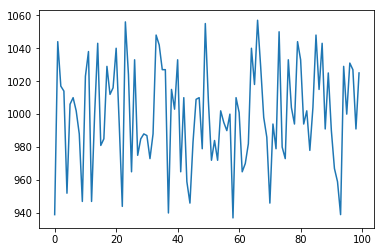

In [1]:
%matplotlib inline
import numpy as np
import collections as col
import matplotlib.pyplot as plt

total_count = 100000    # 一共产生10万个随机数
section_count = 100    # 将10万个随机数分成100个区间分别统计数量
min_value = 0
max_value = 100

data = np.random.randint(min_value, max_value, total_count) # 0~100之间的整数，随机生成100000个
#data = (np.random.rand(total_count)*100).astype(int) # 随机生成0~1之间随机数100000个，放大100倍，再转成整数
#data = (np.random.random(total_count)*100).astype(int) # 随机生成0~1之间随机数100000个，放大100倍，再转成整数
counts = col.Counter(data)    # 分别统计0~100之间每个整数出现的次数

x = np.arange(section_count)
y = np.zeros(section_count)
for i in x:
    y[i] = counts[i]

plt.plot(x, y)
plt.show()

### **案例2：标准正态分布随机数：randn**
> **观察*randn*生成的随机数，其分布满足标准正态分布**

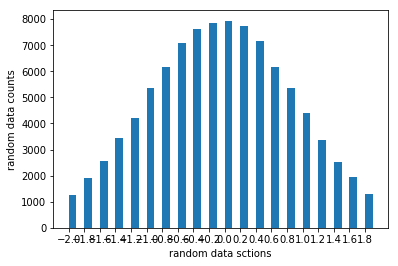

In [2]:
%matplotlib inline
import numpy as np
import collections as col
import matplotlib.pyplot as plt

total_count = 100000
section_count = 20
section_max_value = 2.0 #仅统计-2.0~2.0之间的样本数
section_min_value = -2.0
section_interval = (section_max_value - section_min_value) / section_count

data = np.random.randn(total_count)
counts = np.array(section_count)
x = np.arange(section_min_value, section_max_value, section_interval)
y = np.zeros(len(x))

# 按照-2.0~-1.9, -1.9~-1.8...... -0.1~0.0, 0.0~0.1, 0.1~0.2....1.9~2.0的区间计算data在各区间的数量
for value in data:
    if value > section_max_value or value < section_min_value:
        continue
    index = int((value - section_min_value) / section_interval) # 计算区间编号。只取计算结果的整数部分作为编号
    y[index] += 1

plt.xticks(np.arange(section_min_value, section_max_value, section_interval))
bar_width = section_interval/2
plt.bar(x+bar_width/2, y, bar_width)
plt.xlabel("random data sctions")
plt.ylabel("random data counts")
plt.show()